In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Project Name: GROCERY INVENTORY MANAGEMENT

Business Context: FreshMart Retail, a local grocery store chain, needs a system to manage its inventory effectively. This project aims to develop a tool to track grocery stock, monitor purchase status, and reduce overstocking or shortages.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Inventory file to store data
inventory_file = 'freshmart_inventory.txt'
open(inventory_file, 'a').close()

In [ ]:
# Stock thresholds
LOW_STOCK_THRESHOLD = 5
OVERSTOCK_THRESHOLD = 100

In [ ]:
#Helper Functions
def read_inventory():
    with open(inventory_file, 'r') as f:
        return [line.strip().split(',') for line in f if line.strip()]

def write_inventory(data):
    with open(inventory_file, 'w') as f:
        for name, qty in data:
            f.write(f"{name},{qty}\n")

In [ ]:
#Inventory Functions
def add_inventory(_):
    name = item_name_input.value.strip()
    qty = item_qty_input.value
    if not name:
        result_area.value = "Please enter a valid item name."
        return
    with open(inventory_file, 'a') as f:
        f.write(f"{name},{qty}\n")
    result_area.value = f"Item '{name}' added with quantity {qty}."
    item_name_input.value, item_qty_input.value = "", 0
    check_stock_levels(name, qty)

def update_inventory(_):
    name = item_name_input.value.strip()
    qty = str(item_qty_input.value)
    data = read_inventory()
    updated = False
    for i, (item, _) in enumerate(data):
        if item == name:
            data[i] = (item, qty)
            updated = True
    write_inventory(data)
    result_area.value = f"{'Updated' if updated else 'Item not found'}: {name}"
    item_name_input.value, item_qty_input.value = "", 0
    if updated:
        check_stock_levels(name, int(qty))

def search_inventory(_):
    name = item_name_input.value.strip()
    for item, qty in read_inventory():
        if item == name:
            result_area.value = f"{item} - {qty} units in stock."
            return
    result_area.value = f"{name} not found in inventory."

def remove_inventory(_):
    name = item_name_input.value.strip()
    data = read_inventory()
    new_data = [(item, qty) for item, qty in data if item != name]
    removed = len(new_data) != len(data)
    write_inventory(new_data)
    result_area.value = f"{'Removed' if removed else 'Item not found'}: {name}"
    item_name_input.value, item_qty_input.value = "", 0

def generate_inventory(_):
    data = read_inventory()
    if not data:
        result_area.value = "Inventory is currently empty."
    else:
        inventory_text = "\n".join([f"{item}: {qty} units" for item, qty in data])
        result_area.value = f"FreshMart Inventory:\n{inventory_text}"

def check_stock_levels(item_name, qty):
    if qty <= LOW_STOCK_THRESHOLD:
        result_area.value += f"\n Warning: '{item_name}' is running low. Consider reordering."
    elif qty >= OVERSTOCK_THRESHOLD:
        result_area.value += f"\n Notice: '{item_name}' may be overstocked. Review purchase strategy."

In [ ]:
#Analytics Functions
def load_inventory_as_df():
    data = read_inventory()
    if not data:
        return pd.DataFrame(columns=["Item", "Quantity"])
    df = pd.DataFrame(data, columns=["Item", "Quantity"])
    df["Quantity"] = df["Quantity"].astype(int)
    return df

def show_inventory_summary(_):
    df = load_inventory_as_df()
    if df.empty:
        result_area.value = "Inventory is empty. No data to analyze."
        return

    total_items = df.shape[0]
    total_quantity = df["Quantity"].sum()
    low_stock_items = df[df["Quantity"] <= LOW_STOCK_THRESHOLD]
    overstock_items = df[df["Quantity"] >= OVERSTOCK_THRESHOLD]

    summary = (
        f" Inventory Summary:\n"
        f"- Total Items: {total_items}\n"
        f"- Total Quantity in Stock: {total_quantity}\n"
        f"- Low Stock Items: {len(low_stock_items)}\n"
        f"- Overstocked Items: {len(overstock_items)}\n"
    )
    result_area.value = summary

def plot_stock_levels(_):
    df = load_inventory_as_df()
    if df.empty:
        result_area.value = "Inventory is empty. No chart to display."
        return

    plt.figure(figsize=(8, 4))
    bars = plt.bar(df["Item"], df["Quantity"], color="skyblue")

    for bar, qty in zip(bars, df["Quantity"]):
        if qty <= LOW_STOCK_THRESHOLD:
            bar.set_color('orange')
        elif qty >= OVERSTOCK_THRESHOLD:
            bar.set_color('red')

    plt.axhline(LOW_STOCK_THRESHOLD, color='orange', linestyle='--', label='Low Stock Threshold')
    plt.axhline(OVERSTOCK_THRESHOLD, color='red', linestyle='--', label='Overstock Threshold')
    plt.title(" Inventory Stock Levels")
    plt.ylabel("Quantity")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
#UI Widgets
item_name_input = widgets.Text(description="Item Name:")
item_qty_input = widgets.IntText(description="Quantity:", value=0)

add_button = widgets.Button(description="Add Item")
add_button.on_click(add_inventory)

update_button = widgets.Button(description="Update Item")
update_button.on_click(update_inventory)

search_button = widgets.Button(description="Search Item")
search_button.on_click(search_inventory)

remove_button = widgets.Button(description="Remove Item")
remove_button.on_click(remove_inventory)

generate_button = widgets.Button(description="Show All Stock")
generate_button.on_click(generate_inventory)

summary_button = widgets.Button(description="Show Summary ")
summary_button.on_click(show_inventory_summary)

plot_button = widgets.Button(description="Show Stock Chart ")
plot_button.on_click(plot_stock_levels)

result_area = widgets.Textarea(
    value="FreshMart Inventory System Ready.",
    layout=widgets.Layout(width='60%', height='180px')
)

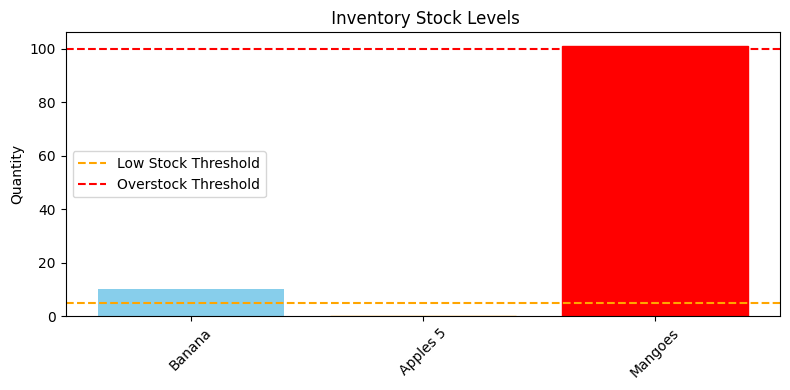

In [ ]:
#Layout and Display
ui = widgets.VBox([
    item_name_input,
    item_qty_input,
    widgets.HBox([add_button, update_button]),
    widgets.HBox([search_button, remove_button]),
    generate_button,
    widgets.HBox([summary_button, plot_button]),
    result_area
])

display(ui)